# ________________________________________________________________________
# Getting started with GPT-2
# ________________________________________________________________________

## 0: Install required libraries

In [ ]:
#! pip install transfomers
#! pip install torch
import transformers
import torch

ERROR: Could not find a version that satisfies the requirement transfomers (from versions: none)
ERROR: No matching distribution found for transfomers


In [11]:
import numpy as np
import matplotlib.pyplot as plt

## 1: Using the model

How can we use GPT-2? Basically, we have two options:

- **the "low level" option**: use GPT-2 specific API. 

  - Provides finer control. You specify attention masks, padding tokens, decoding, etc. You’re interacting **directly** with the model and tokenizer objects. 
  - Better for customization** — e.g., adding constraints, working with batches, doing masked generation, etc.


- **the "high level" option**: use the  `transformers.pipeline` API. 
  - This is a "wrapper" around the model. You don’t need to manually encode or decode anything. Automatically handles tokenization, decoding and attention under the hood.
  - It is faster and easier to use.

### 1.1: GPT-2 API.

GPT-2 is provided as an API (Application Programming Interface) inside the Python library "Transformers" from HuggingFace.

From the main page of the Transformers documentation, look for: Transformers/API/Text Models/GPT-2. Alternatively, follow [this link](https://huggingface.co/docs/transformers/en/model_doc/gpt2).

#### A first basic example of text generation.

- Import `transformers.GPT2Tokenizer` and `transformers.GPT2LMHeadModel`. The flag model="gpt2" loads the GPT-2 model and tokenizer, in the base version (i.e. the smallest sized model). If you want you can specify other variants like: "gpt2-medium", "gpt2-large", "gpt2-xl".

- **GPT2Tokenizer class**: Contains both the encoder and the decoder. The flag return_tensors='pt' tells the tokenizer to return a PyTorch tensor (not just a list), because that's what the model expects.

- **LMHeadModel**: The GPT-2 model architecture that generates text (predicts the next token based on previous tokens).

- **Padding**: The input text is always tokenized and converted into a tensor, which is a multidimensional rectangular array. If you want, you may provide an input consisting of several sequences. In general, after tokenization the sequences will have different lengths. This implies the tokenized input cannot be stored in a tensor as it is. Therefore, a padding token is added to the right or to the left of the sequence to make the dimension homogeneous.

- **Attention**: The attention mask is a binary tensor indicating the position of the padded indices so that the model does not attend to them. For the GPT2Tokenizer, 1 indicates a value that should be attended to, while 0 indicates a padded value. This attention mask is in the dictionary returned by the tokenizer under the key “attention_mask”.

### 1.2: `transformers.pipeline` API.

Now we run the same example as above, but using the higher level interface provided by the class `pipeline`. Encoding and decoding is under the hood.

In [12]:
from transformers import pipeline, set_seed
set_seed(42)
input_text = ["Hello", "Hello dear!"]
generator = pipeline('text-generation', model='gpt2', device=-1) # Use device=0 for GPU, or device=-1 for CPU
output = generator(input_text,
                    pad_token_id = 50256,
                    truncation = True,
                    max_length=30,
                    temperature=0.1,
                    num_return_sequences=1)



for idx, field in enumerate(output):
    print(f"Sequence {idx}: ")
    print("Decoded input: ", input_text[idx])
    print("Decoded Output:", field[0]["generated_text"])
    print("_________________________")

Device set to use cpu


Sequence 0: 
Decoded input:  Hello
Decoded Output: Hello, I'm not sure if you're aware of the fact that I'm a member of the American Association of Chiefs of Police. I'm a
_________________________
Sequence 1: 
Decoded input:  Hello dear!
Decoded Output: Hello dear! I'm sorry, but I'm not sure what to do. I'm not sure if I should go back to the hospital or not
_________________________


# __________________________________________

In [16]:
from transformers import pipeline
import torch
from transformers import AutoModel, AutoTokenizer, AutoModelForCausalLM
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import random

In [17]:
# Initialize the text generation pipeline
generator = pipeline("text-generation", model="gpt2", device=-1)  # Use device=0 for GPU, or device=-1 for CPU
output = generator("Q: What is the capital of France? A: Paris. Q: What is the capital of Italy? A:", max_length=30, temperature=0.9, num_return_sequences=3)

#IDK se è utile ma ci sono modi per forzare le parole che genera. 

# Print the generated text
for idx, generated_text in enumerate(output):
    print(f"Generated Text {idx + 1}: {generated_text['generated_text']}")

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text 1: Q: What is the capital of France? A: Paris. Q: What is the capital of Italy? A: Milan. Q: What is
Generated Text 2: Q: What is the capital of France? A: Paris. Q: What is the capital of Italy? A: Milan. Q: What is
Generated Text 3: Q: What is the capital of France? A: Paris. Q: What is the capital of Italy? A: Milan. Q: What is


In [18]:

#model = AutoModel.from_pretrained( "gpt2", output_hidden_states=True)  #load pretrained from Hugging Face
model = AutoModelForCausalLM.from_pretrained("gpt2", output_attentions=True, output_hidden_states=True)

tokenizer = AutoTokenizer.from_pretrained("gpt2")                     #trasforma input in token


/Users/giorgiafasiolo/opt/anaconda3/lib/python3.12/site-packages/transformers/generation/configuration_utils.py:820: UserWarning: `return_dict_in_generate` is NOT set to `True`, but `output_attentions` is. When `return_dict_in_generate` is not `True`, `output_attentions` is ignored.
  warnings.warn(
/Users/giorgiafasiolo/opt/anaconda3/lib/python3.12/site-packages/transformers/generation/configuration_utils.py:820: UserWarning: `return_dict_in_generate` is NOT set to `True`, but `output_hidden_states` is. When `return_dict_in_generate` is not `True`, `output_hidden_states` is ignored.
  warnings.warn(


Prompt: The italian flag's colors are red, white and

Layer  1: Entropy = 0.0345
   1:       Ġthe (0.9970)
   2:         Ġa (0.0018)
   3:          / (0.0006)
   4:         Ġ" (0.0002)
   5:         ĠI (0.0001)
   6:      Ġthen (0.0001)
   7:     Ġother (0.0001)
   8:          , (0.0000)
   9:        Ġin (0.0000)
  10:       Ġand (0.0000)
  11:          Ċ (0.0000)
  12:        Ġis (0.0000)
  13:        Ġan (0.0000)
  14:          - (0.0000)
  15:        Ġit (0.0000)
Layer  2: Entropy = 0.9767
   1:       Ġthe (0.8089)
   2:          / (0.0964)
   3:      Ġthen (0.0772)
   4:     Ġother (0.0147)
   5:         Ġa (0.0015)
   6:         ĠI (0.0010)
   7:         Ġ" (0.0001)
   8:  Ġpossibly (0.0001)
   9:        Ġso (0.0000)
  10:      Ġeven (0.0000)
  11:          , (0.0000)
  12:        Ġit (0.0000)
  13:        Ġin (0.0000)
  14:        Ġan (0.0000)
  15:        Ġis (0.0000)
Layer  3: Entropy = 0.7119
   1:       Ġthe (0.8669)
   2:          / (0.0912)
   3:      Ġthen (0.0374)
   4:  

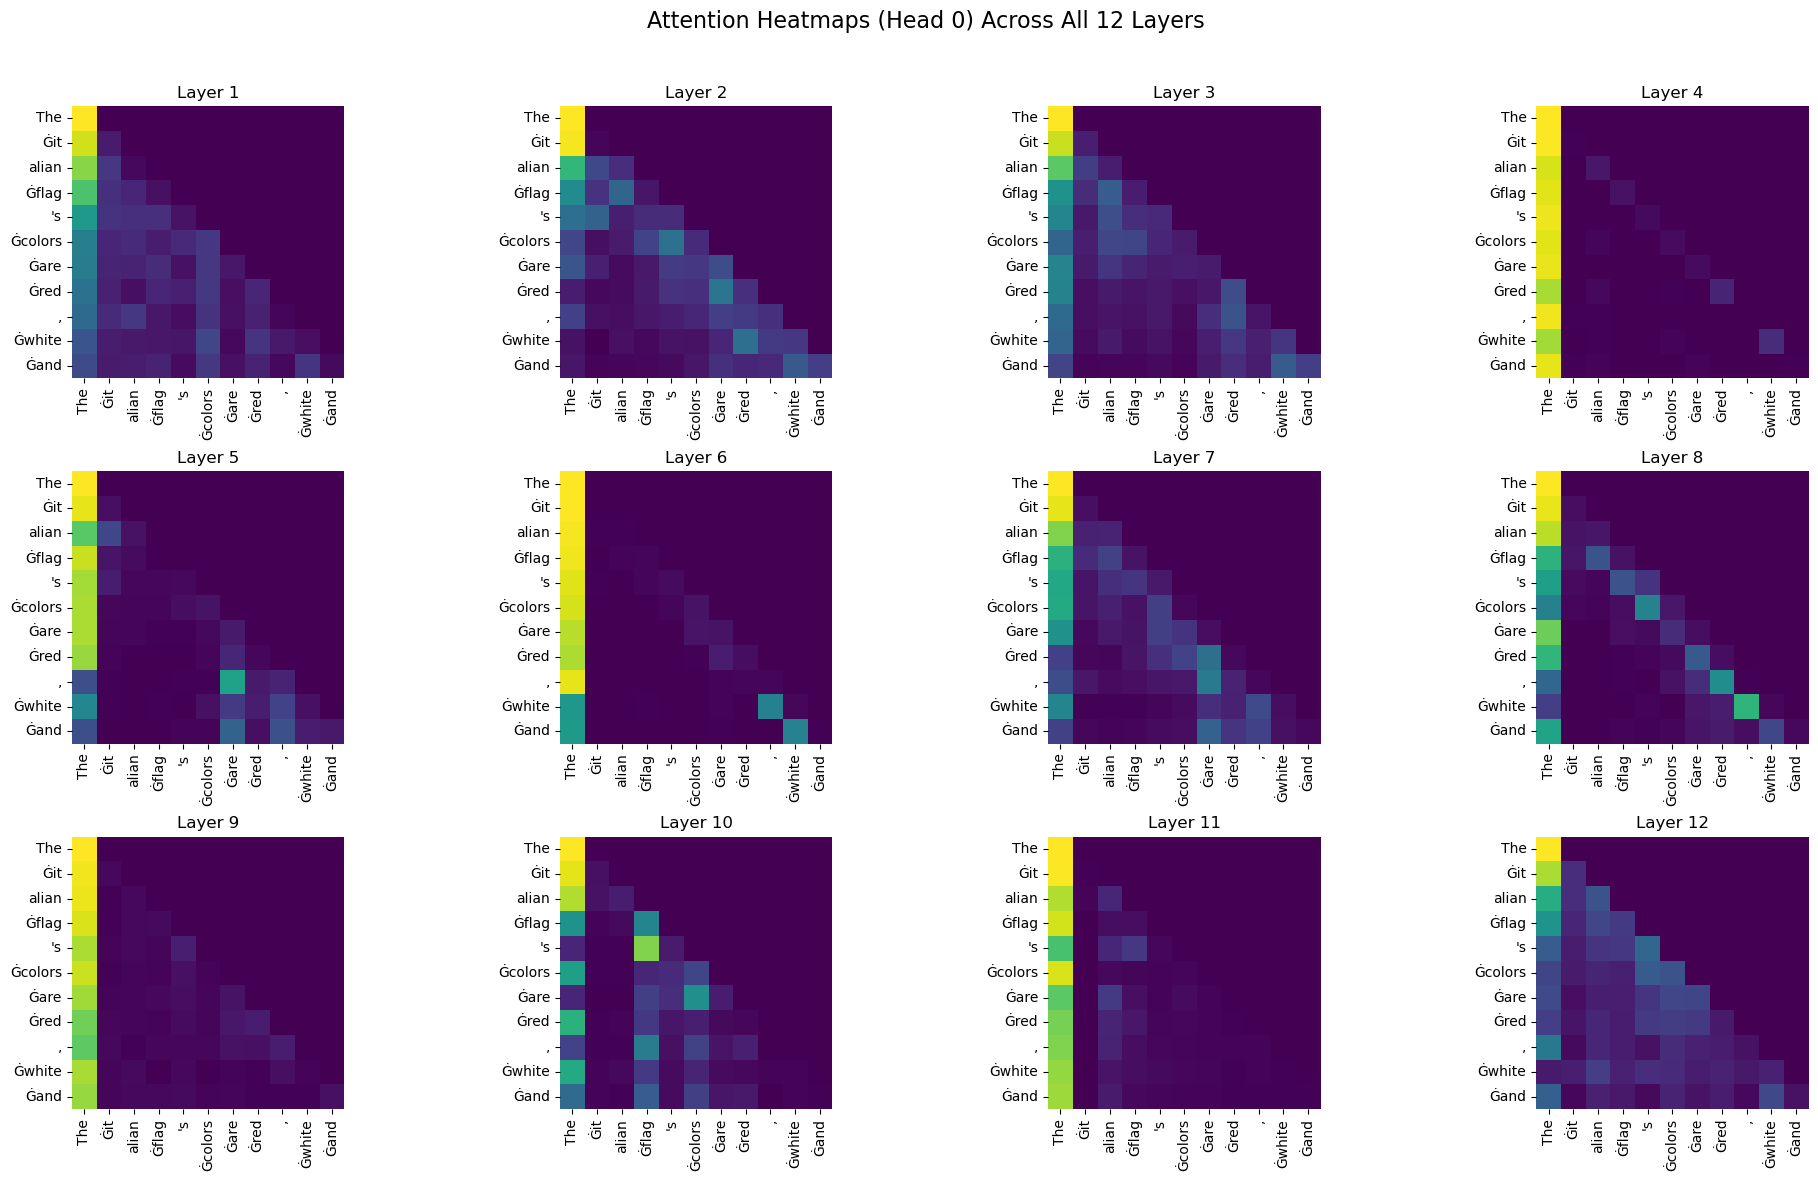

In [34]:
model.eval()

# Input text
prompt = "The italian flag's colors are red, white and"
inputs = tokenizer(prompt, return_tensors="pt")
input_ids = inputs["input_ids"]
tokens = tokenizer.convert_ids_to_tokens(input_ids[0])

# Forward pass with hidden states
with torch.no_grad():
    outputs = model(**inputs)

attentions = outputs.attentions  # List of tensors: [layer][batch, head, seq_len, seq_len], head = Et

hidden_states = outputs.hidden_states  # Tuple: (embeddings + 12 layers), hidden_states = each "line" (1dim of a tensor) è X_seq
n_layers = len(hidden_states)

# Language modeling head
lm_head = model.lm_head  # Linear layer from hidden dim -> vocab size
top_k = 15  # Change as needed
token_position = -1  # Last token in prompt

print(f"Prompt: {prompt}\n")

for i in range(1, n_layers):  # skip embeddings (index 0)
    hidden = hidden_states[i]  # shape: [1, seq_len, hidden_dim]
    last_token_vec = hidden[0, token_position, :]  # shape: [hidden_dim]
    logits = lm_head(last_token_vec)  # shape: [vocab_size]
    probs = torch.softmax(logits, dim=-1)

    # Avoid log(0) by masking zero probabilities -> else you get 0*-inf = nan when probs are zero
    mask = probs > 0
    entropy = -torch.sum(probs[mask] * torch.log2(probs[mask])).item()

    top_probs, top_ids = torch.topk(probs, top_k)
    top_tokens = tokenizer.convert_ids_to_tokens(top_ids)

    print(f"Layer {i:2d}: Entropy = {entropy:.4f}")
    for j in range(top_k):
        print(f"  {j+1:2d}: {top_tokens[j]:>10} ({top_probs[j].item():.4f})")

def plot_attention_layers(attentions, tokens, head_idx=0):
    num_layers = len(attentions)
    seq_len = len(tokens)

    fig, axes = plt.subplots(3, 4, figsize=(20, 12))
    fig.suptitle(f"Attention Heatmaps (Head {head_idx}) Across All 12 Layers", fontsize=16)

    for i in range(num_layers):
        ax = axes[i // 4, i % 4]
        attn = attentions[i][0, head_idx, :, :].detach().numpy()
        sns.heatmap(attn, xticklabels=tokens, yticklabels=tokens, cmap="viridis", ax=ax, square=True, cbar=False)
        ax.set_title(f"Layer {i+1}")
        ax.tick_params(axis='x', rotation=90)
        ax.tick_params(axis='y', rotation=0)

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

# Call function
plot_attention_layers(attentions, tokens, head_idx=0)